# Supervised Learning: Tree Methods Project


Import packages

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import data

In [200]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [202]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Exploratory Data Analysis

In [203]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

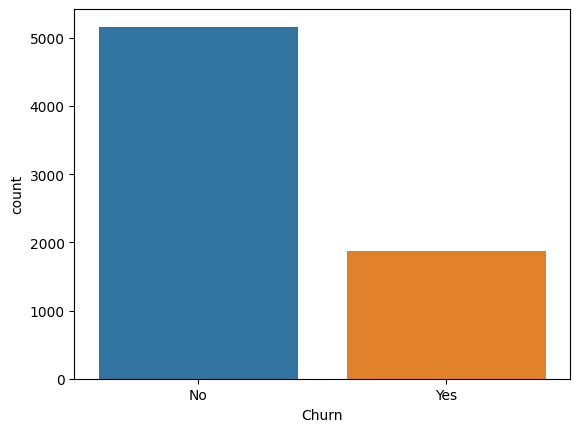

In [204]:
sns.countplot(data=df, x='Churn');

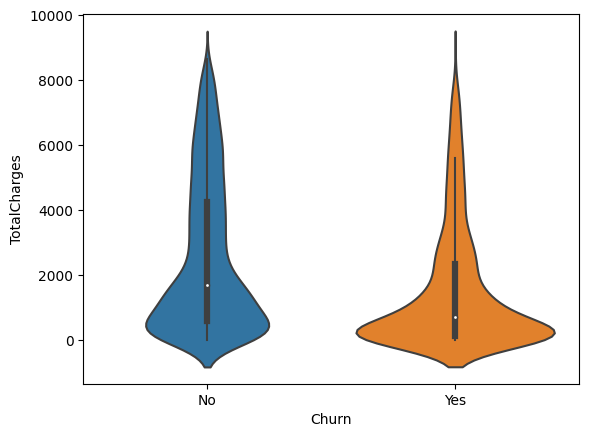

In [205]:
sns.violinplot(data=df, x = 'Churn', y = 'TotalCharges');

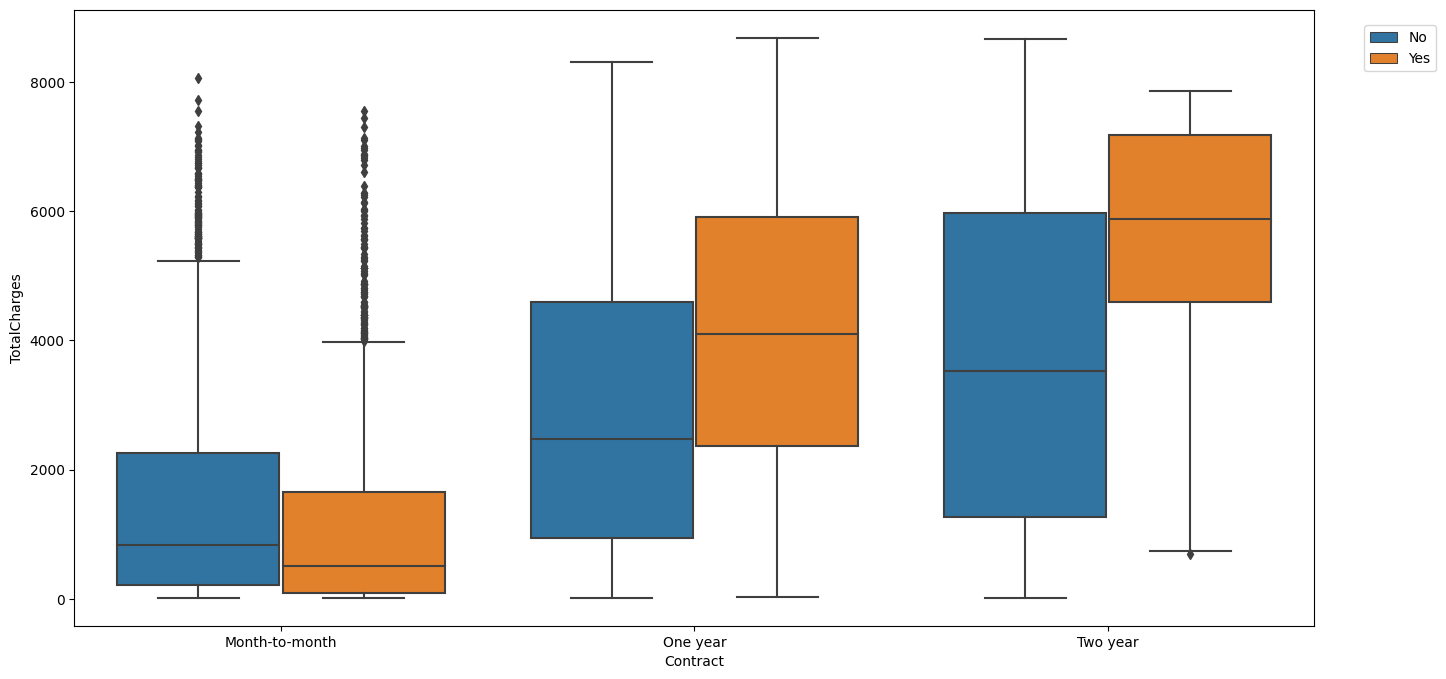

In [206]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df, hue='Churn', y = 'TotalCharges', x = 'Contract')
plt.legend(loc=(1.04,0.9));

In [207]:
df_corr = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]).corr()

In [208]:
df_corr.columns


Index(['SeniorCitizen', 'gender_Female', 'gender_Male', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes'

In [209]:
df_corr['Churn_Yes'].sort_values()[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

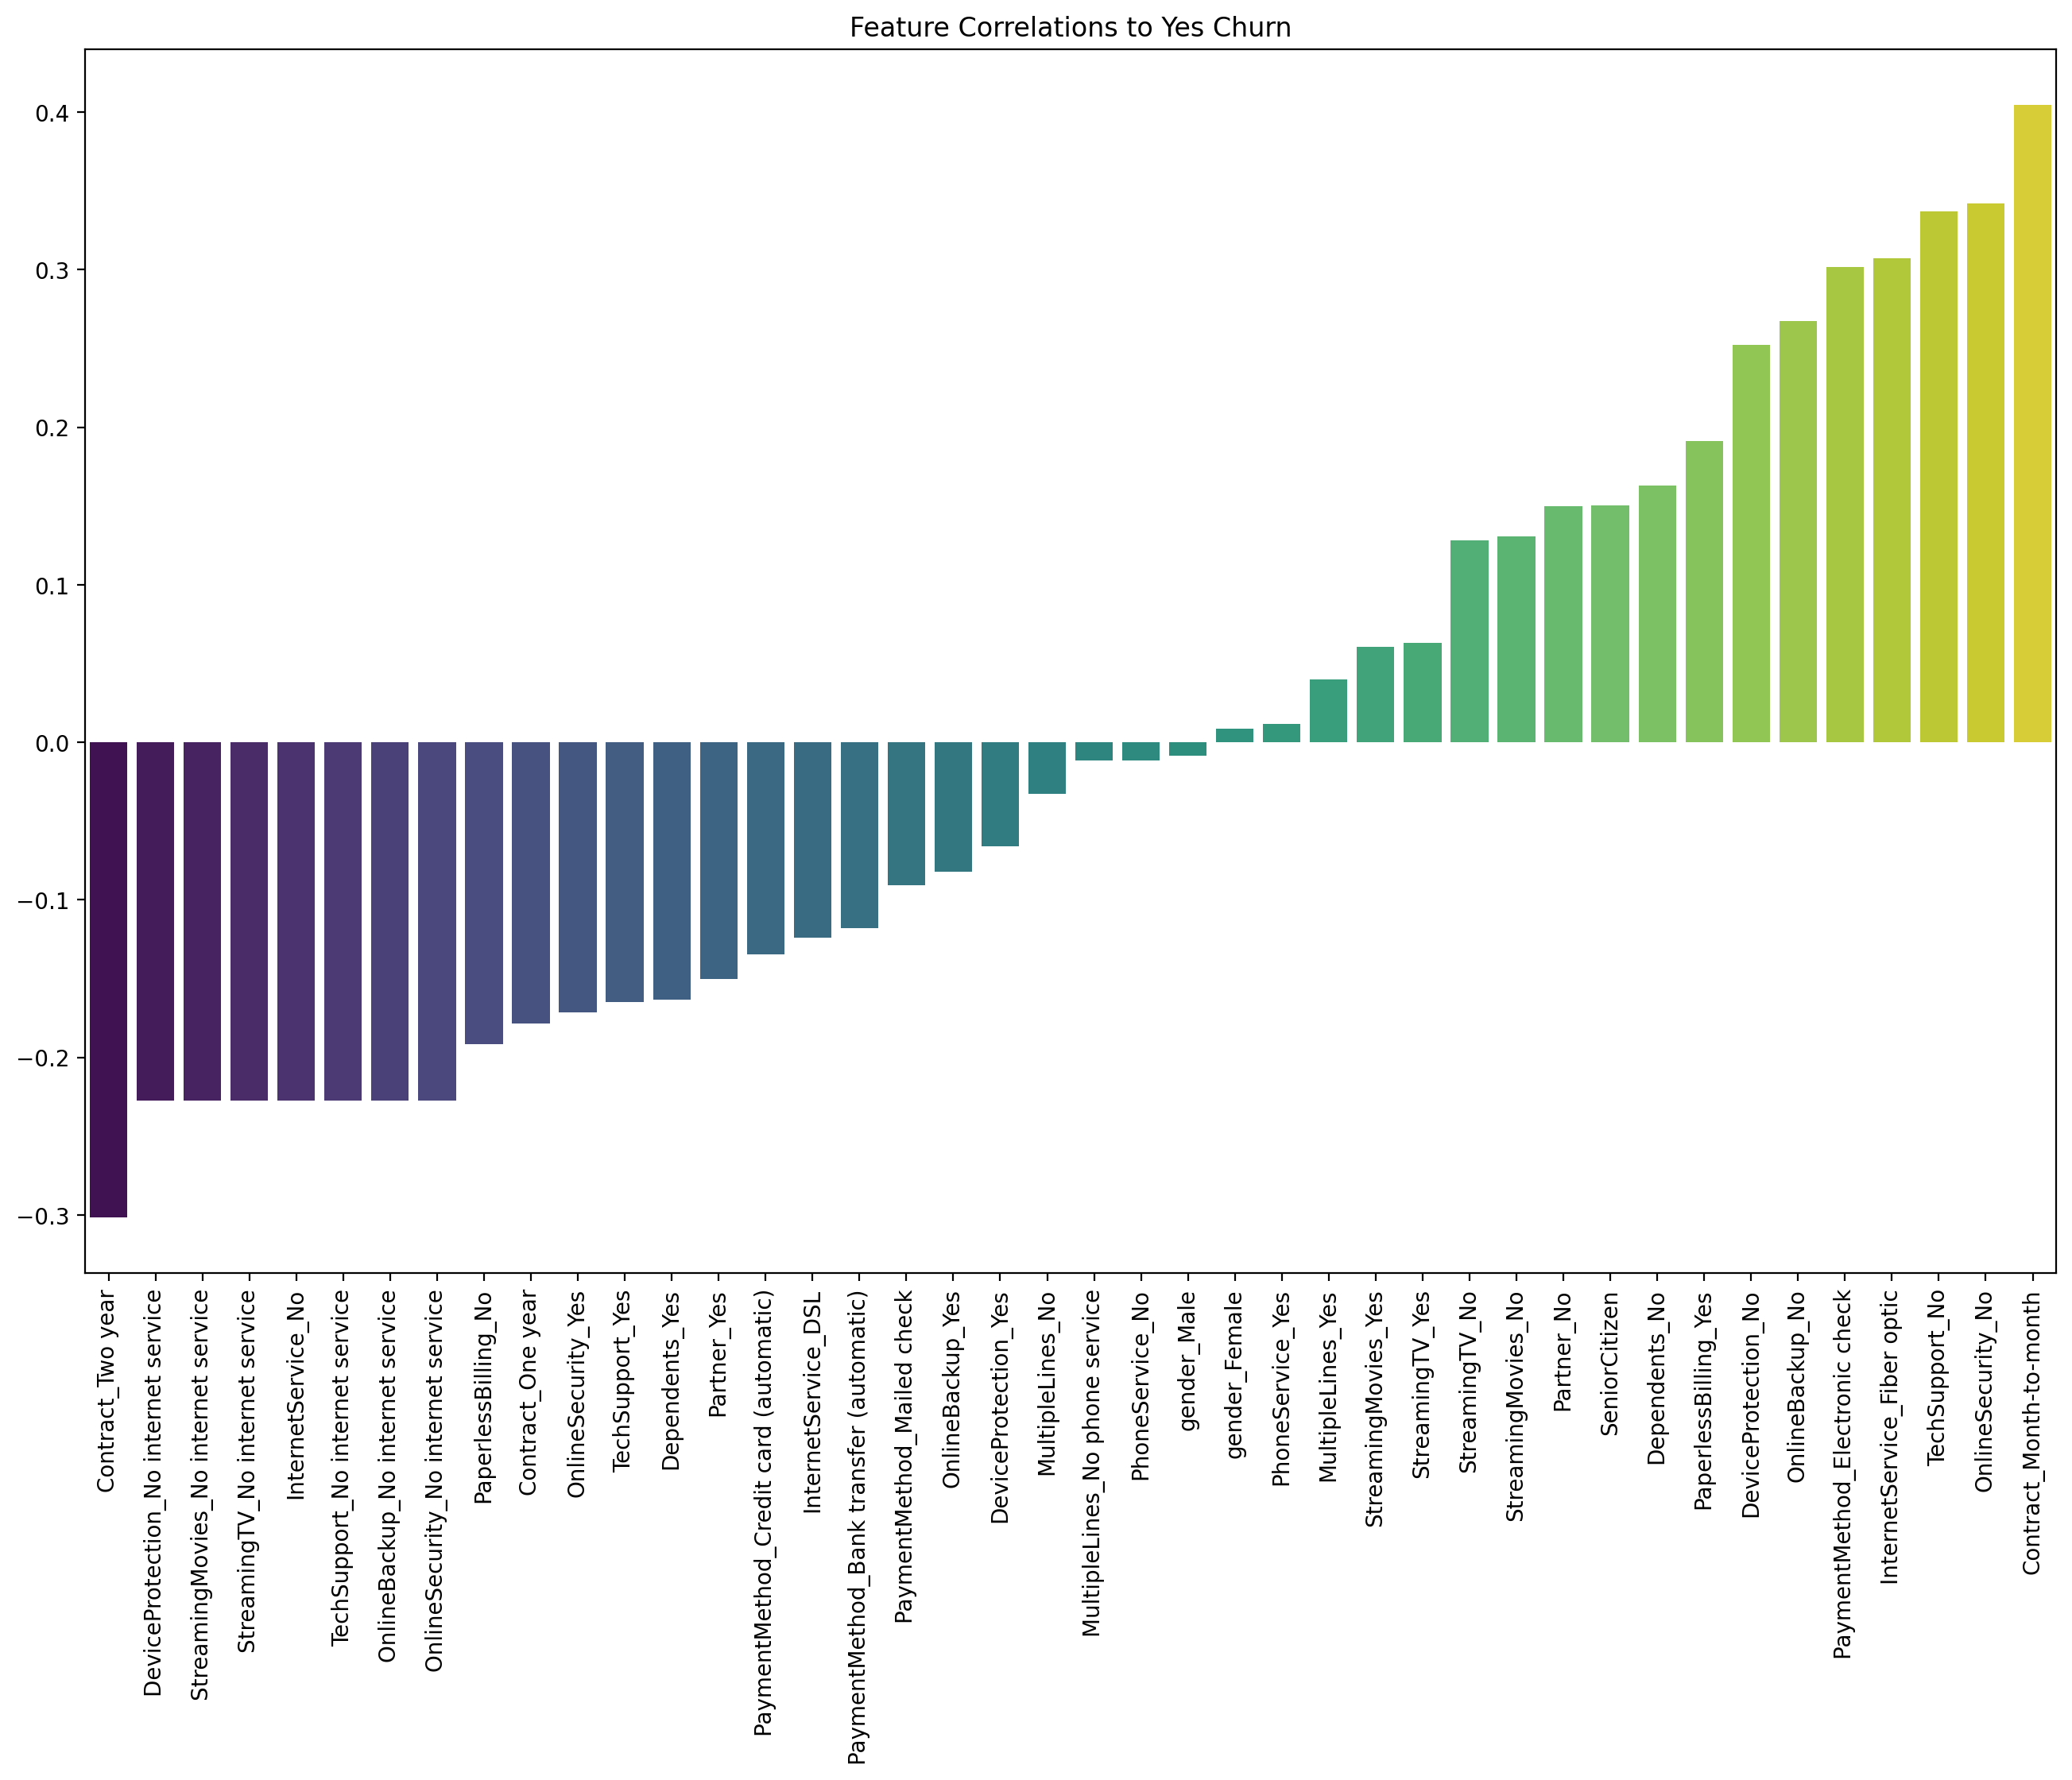

In [210]:
plt.figure(figsize=(16,10), dpi=200)
plt.title('Feature Correlations to Yes Churn')
sns.barplot(x=df_corr['Churn_Yes'].sort_values()[1:-1].index , y=df_corr['Churn_Yes'].sort_values()[1:-1].values, palette='viridis')
plt.xticks(rotation = 90);

---
---

### Churn Analysis

Segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.

In [211]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

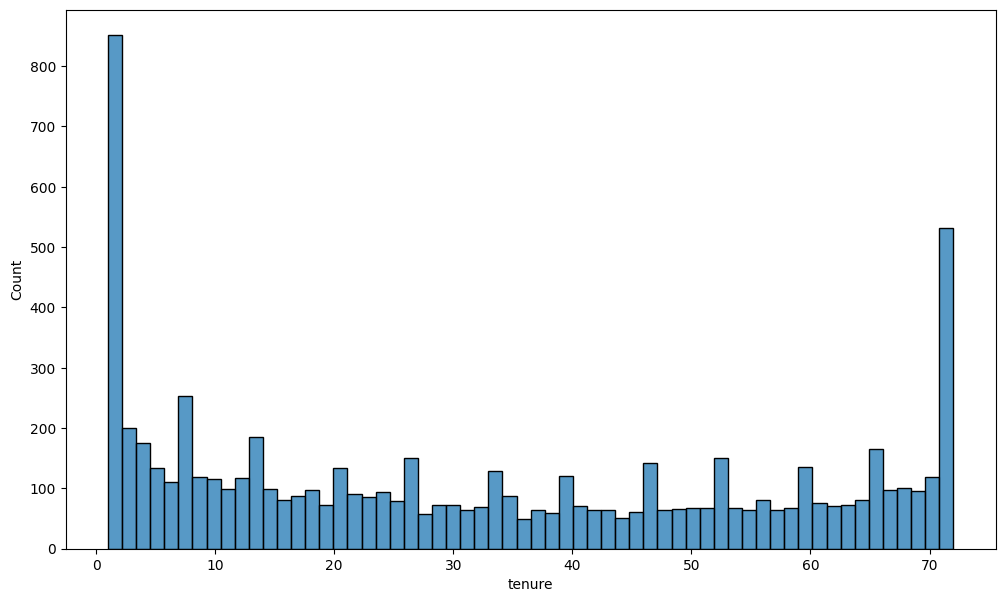

In [212]:
plt.figure(figsize=(12,7))
sns.histplot(data=df, x = 'tenure', bins=60);

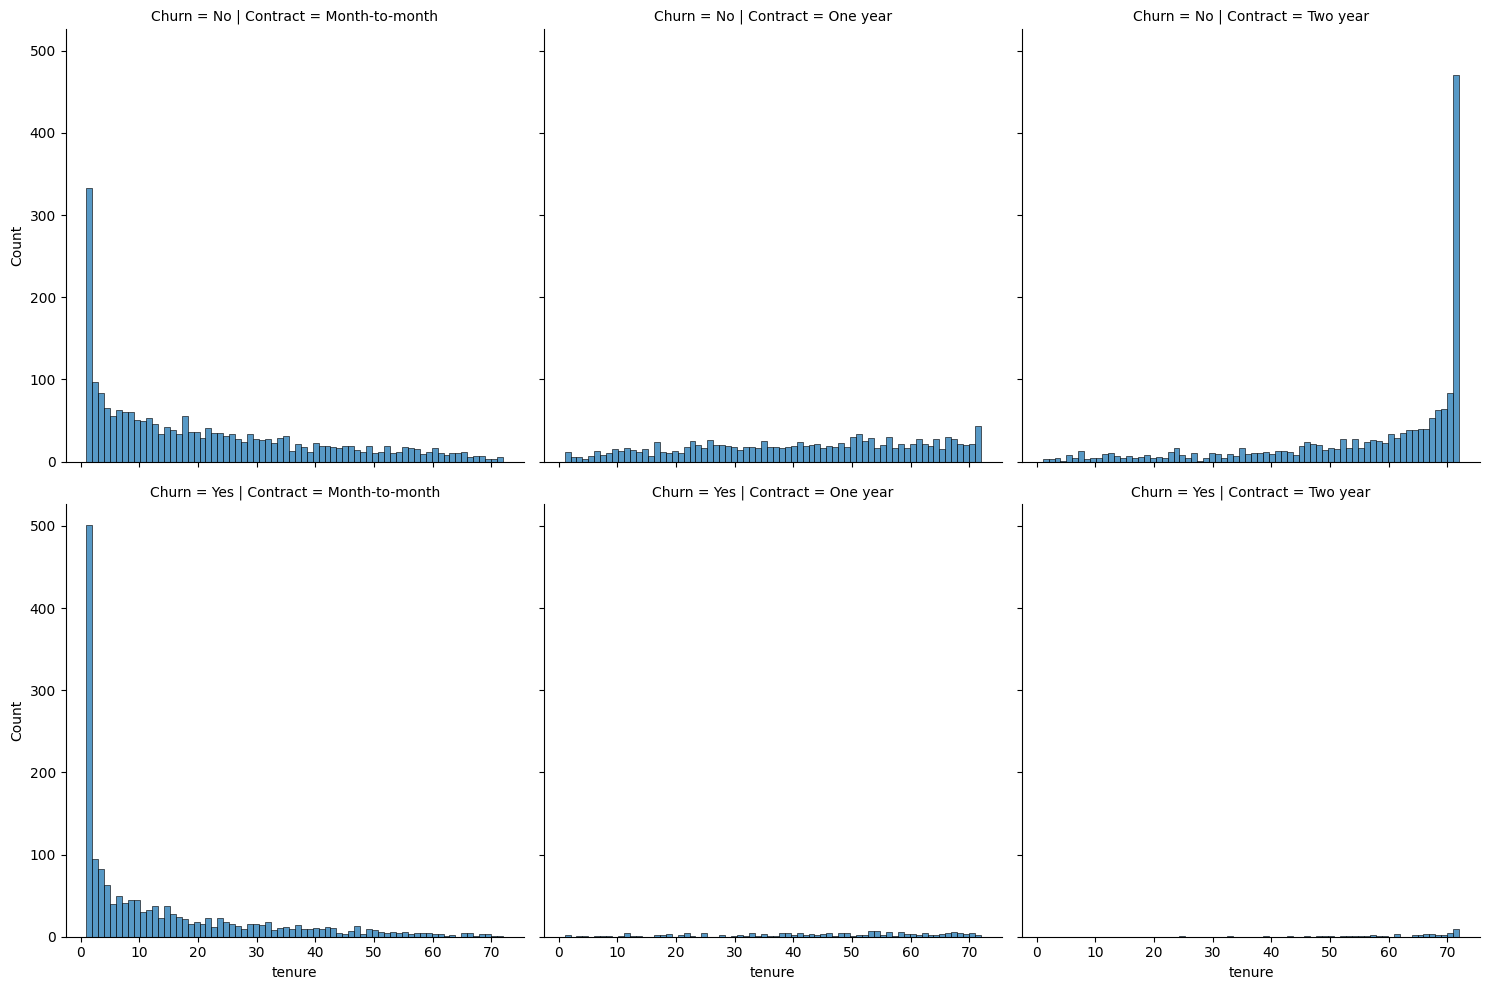

In [213]:
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');

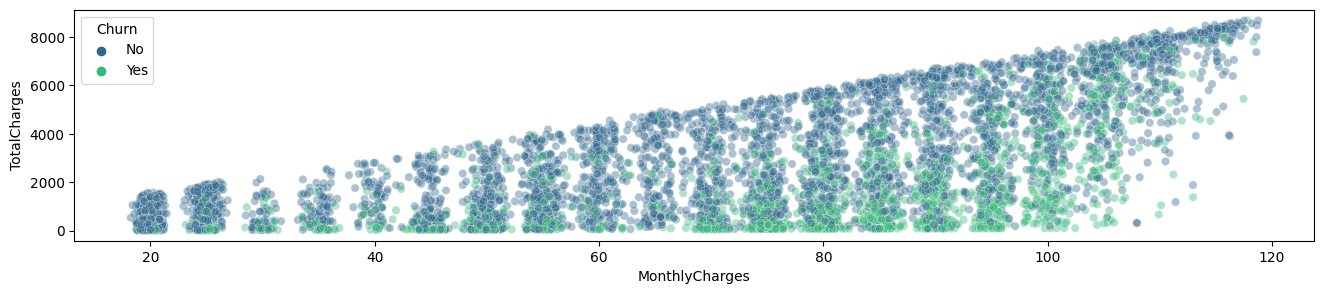

In [214]:
plt.figure(figsize=(16,3))
sns.scatterplot(data=df, x = 'MonthlyCharges', y = 'TotalCharges', hue='Churn', alpha = 0.4, palette='viridis');

In [215]:
Nochurn = df.groupby(['Churn', 'tenure']).count().transpose()['No']
Yeschrun = df.groupby(['Churn', 'tenure']).count().transpose()['Yes']

In [216]:
Churn_rate = 100 * Yeschrun / ( Yeschrun + Nochurn )
Churn_rate = Churn_rate.transpose()

In [217]:
Churn_rate['gender']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: gender, Length: 72, dtype: float64

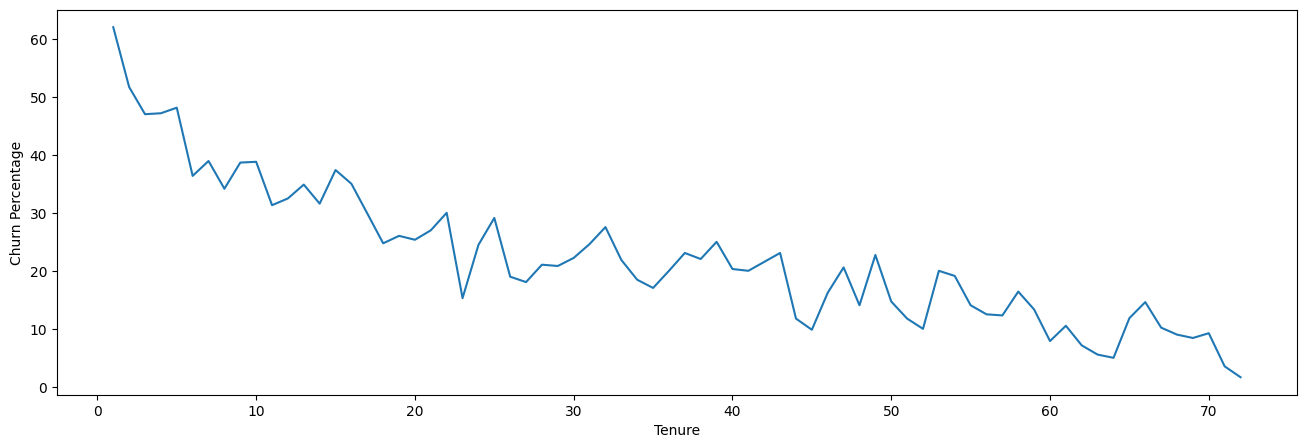

In [218]:
plt.figure(figsize=(16,5))
plt.plot(Churn_rate['gender'].index, Churn_rate['gender'].values)
plt.xlabel('Tenure')
plt.ylabel('Churn Percentage');

Broader Cohort Groups

In [219]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [220]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


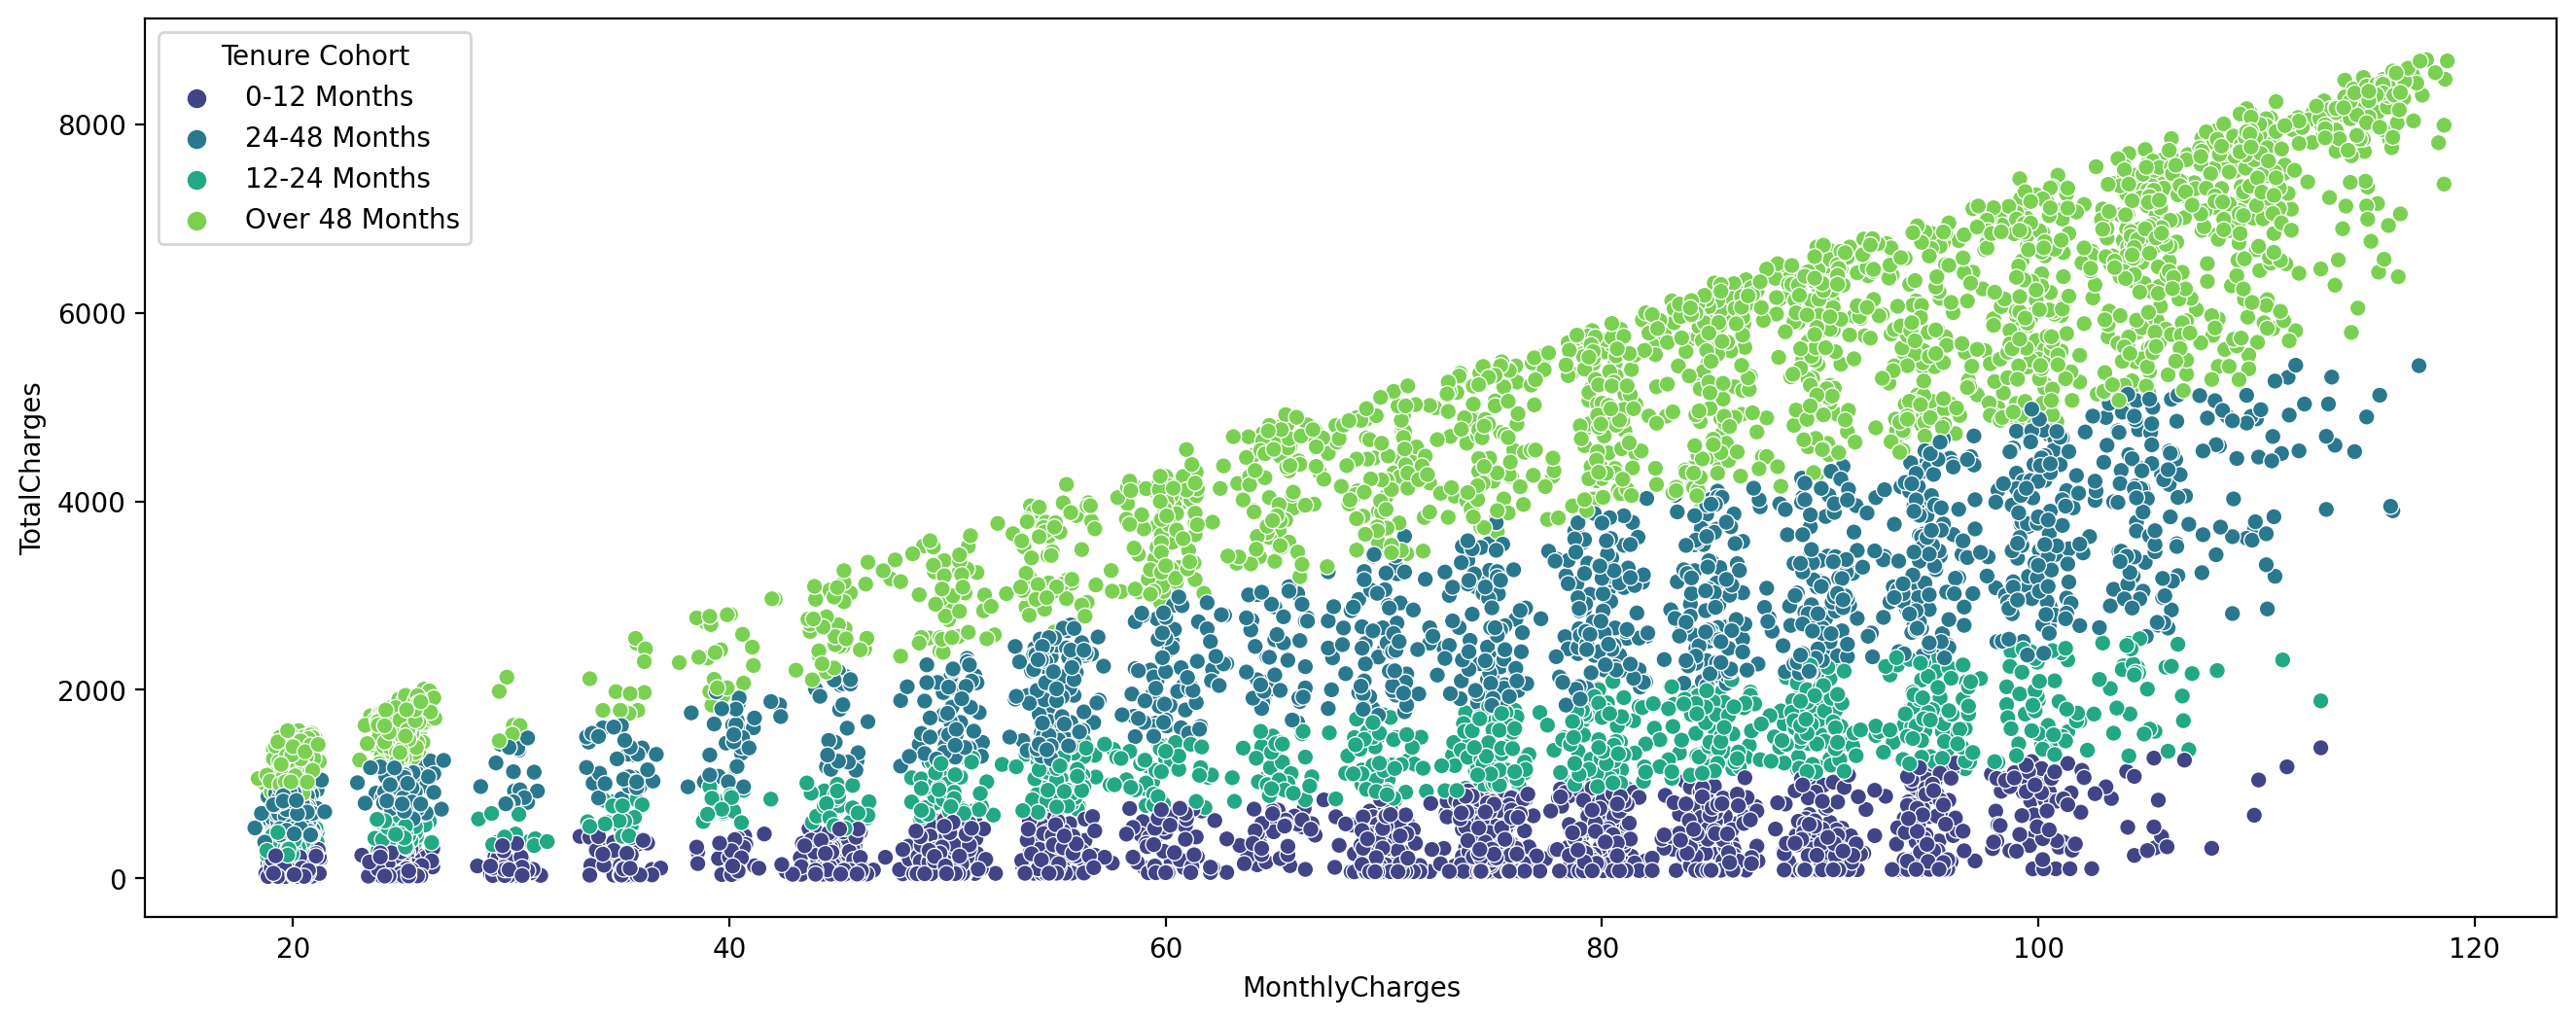

In [221]:
plt.figure(figsize=(16,6), dpi=200)
sns.scatterplot(data=df, hue='Tenure Cohort', x = 'MonthlyCharges', y = 'TotalCharges', palette='viridis');

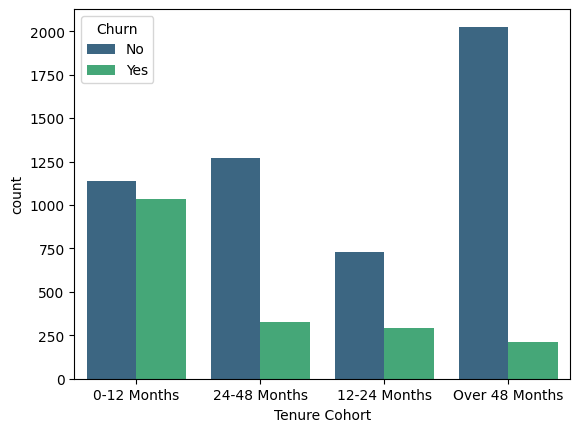

In [222]:
sns.countplot(data=df, x = 'Tenure Cohort', hue='Churn', palette='viridis');

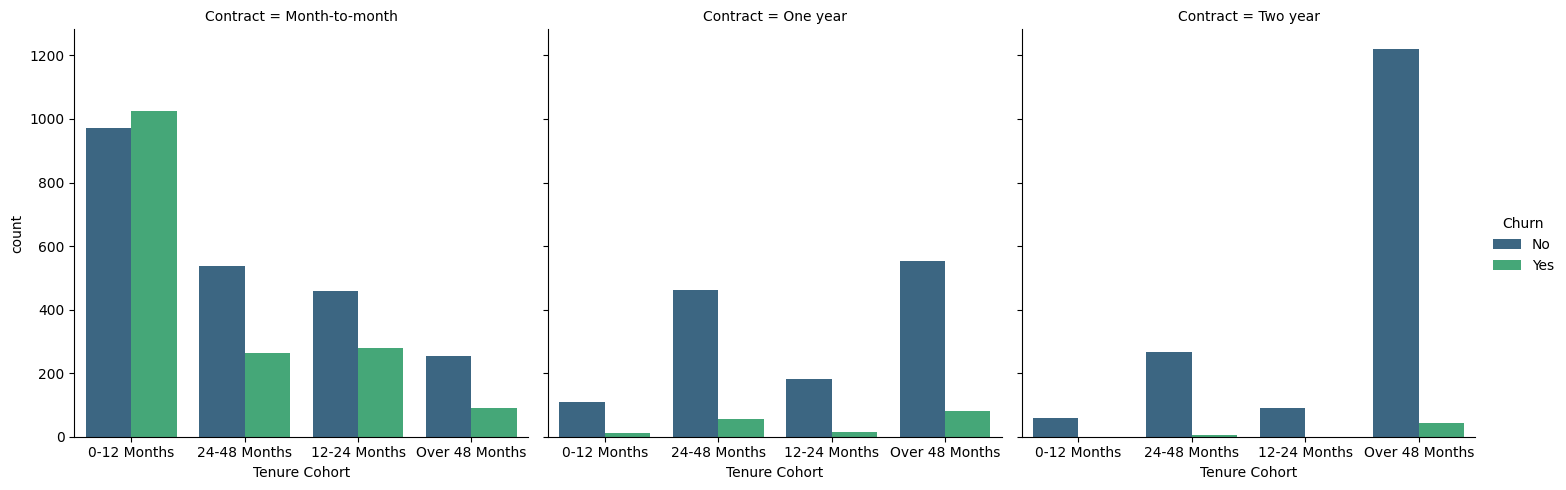

In [223]:
sns.catplot(data=df, col='Contract', x = 'Tenure Cohort', kind='count', hue='Churn', palette='viridis');

-----

### Predictive Modeling


In [224]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

y = df['Churn']

In [225]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=101)

### Comparing different estimators

In [226]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6)

parameters = {'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2']}

In [227]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, param_grid = parameters, cv=5)

In [228]:
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'entropy', 'max_features': 'log2'}

In [229]:
model = DecisionTreeClassifier(criterion = 'entropy', max_features = 'sqrt', max_depth=6)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='sqrt')

In [230]:
y_pred = model.predict(X_test)

In [231]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.51      0.48      0.49       147

    accuracy                           0.79       704
   macro avg       0.69      0.68      0.68       704
weighted avg       0.79      0.79      0.79       704



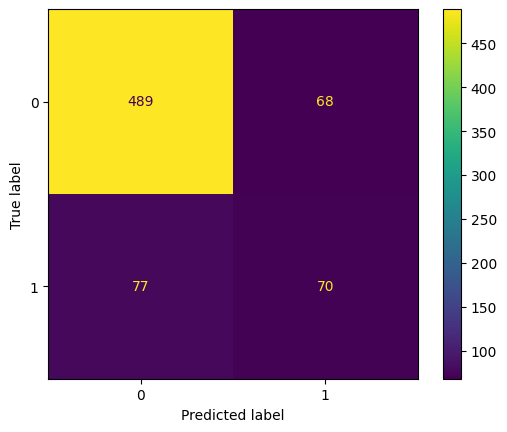

In [232]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

In [233]:
imp_features = pd.DataFrame(data = model.feature_importances_, index=X.columns, columns=['Feature Importance']).sort_values('Feature Importance')

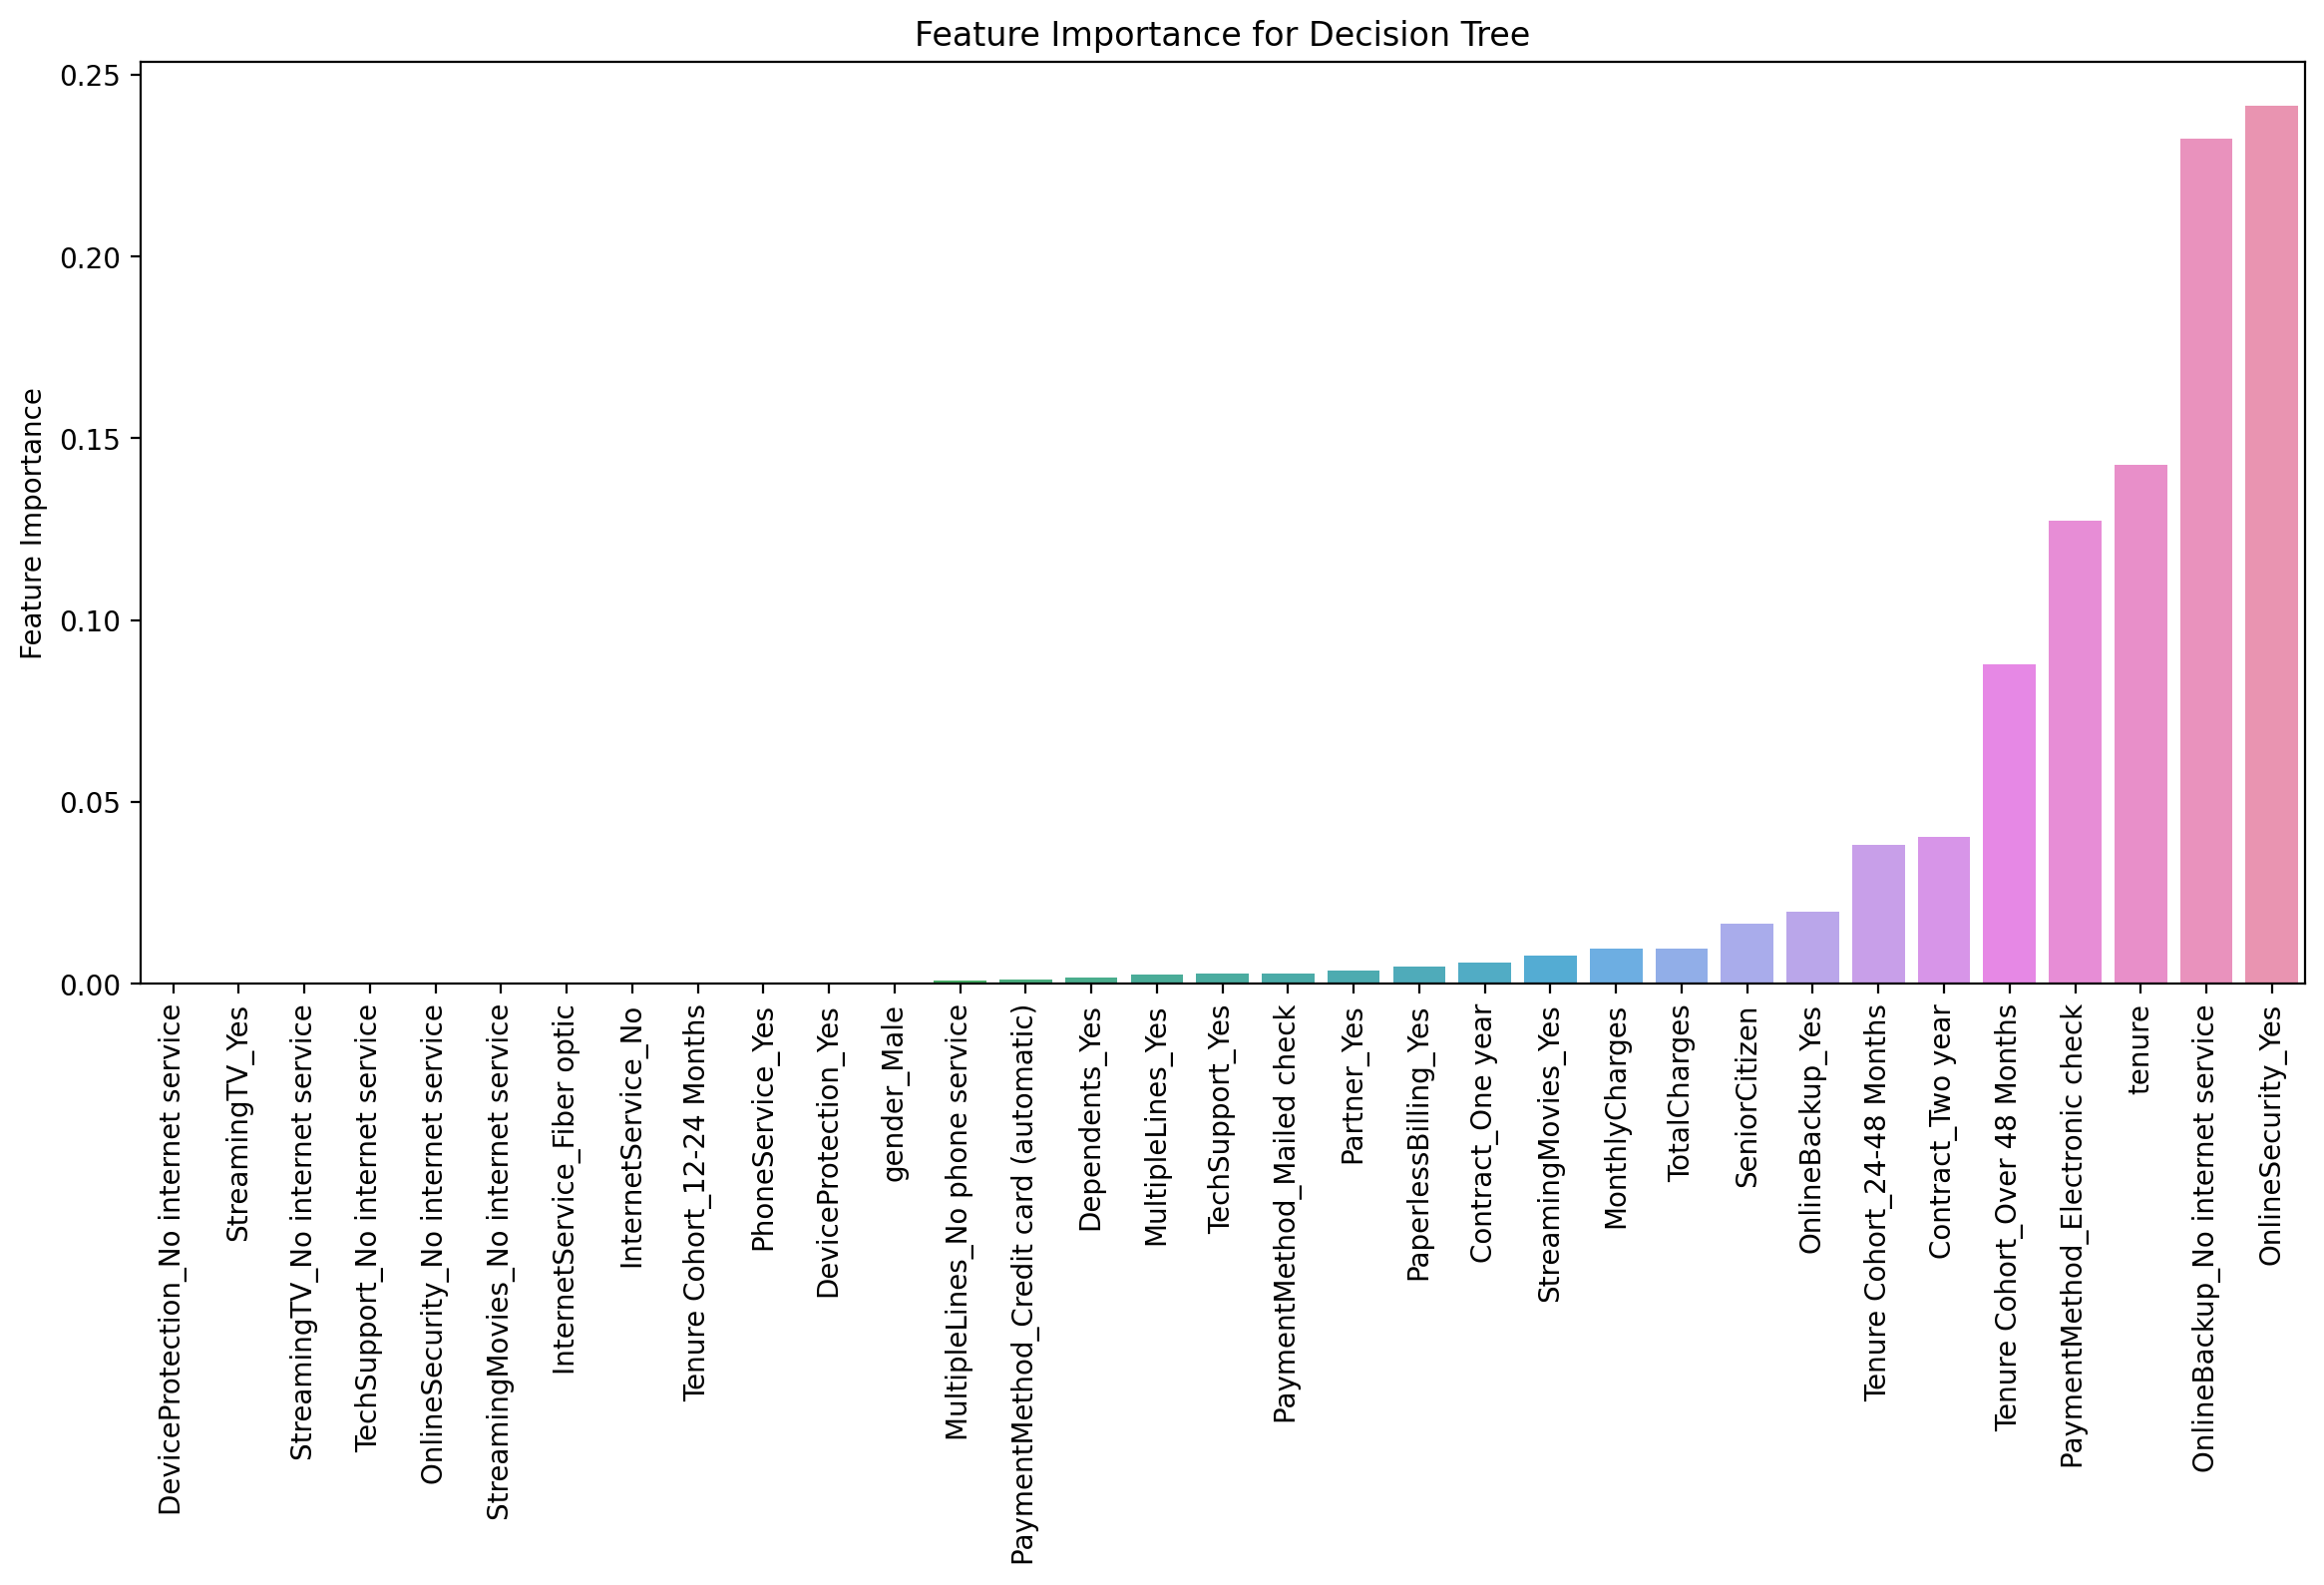

In [234]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_features.sort_values('Feature Importance'),x=imp_features.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

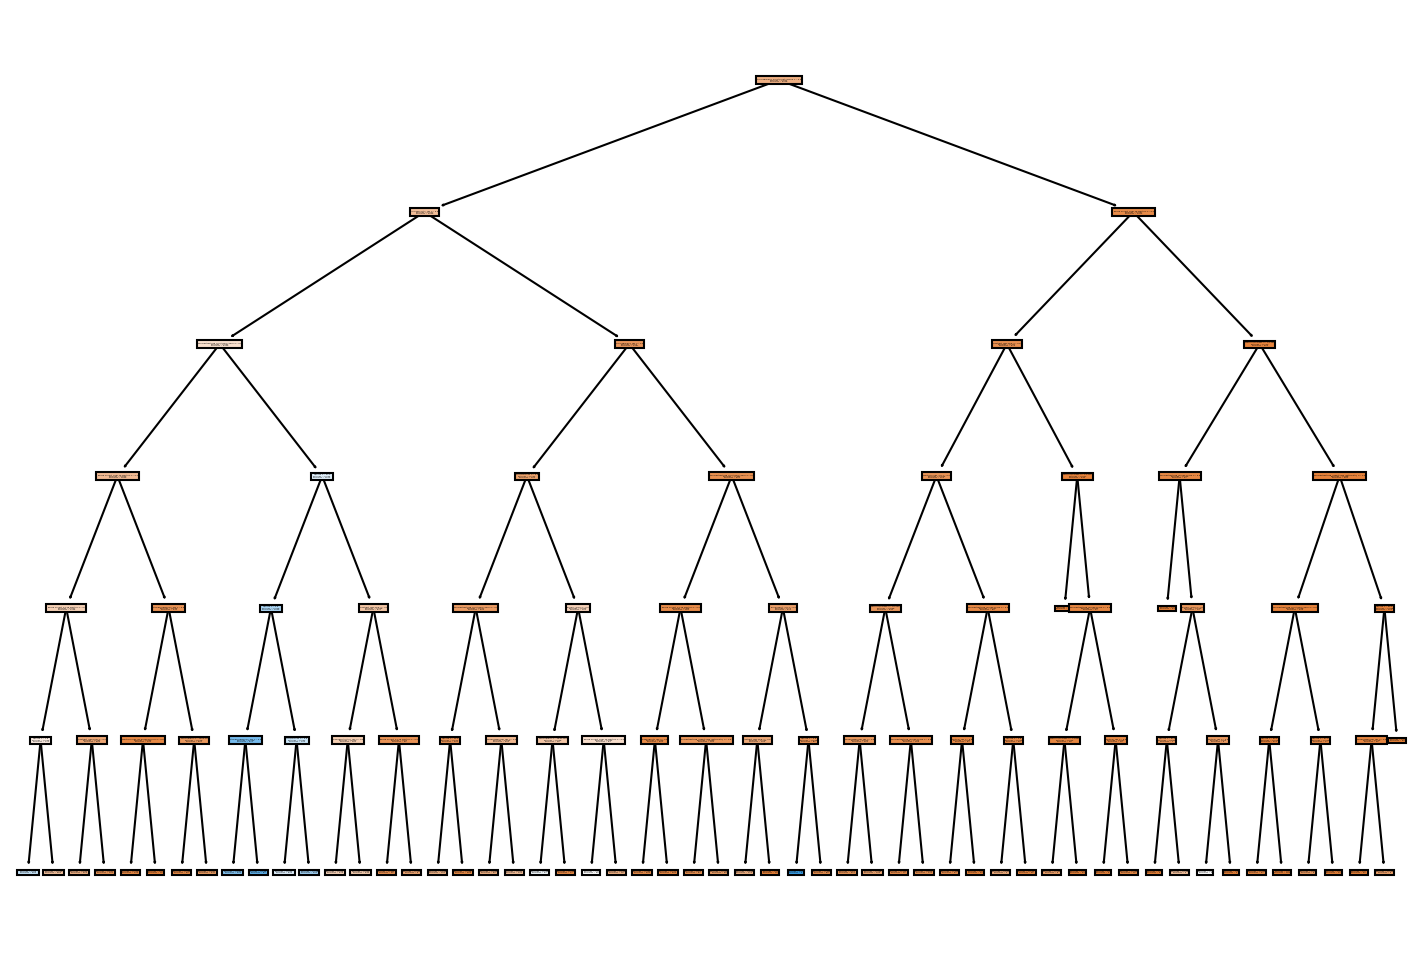

In [235]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

### Random Forest

In [236]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

In [237]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [238]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.86      0.88      0.87       557
         Yes       0.51      0.48      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.68      0.68       704
weighted avg       0.79      0.80      0.79       704



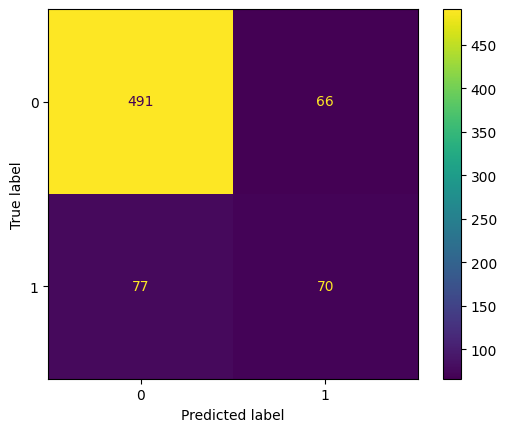

In [239]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

### Boosted Trees


In [240]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier()

In [241]:
ada_model.fit(X_train,y_train)
y_pred = ada_model.predict(X_test)

In [242]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



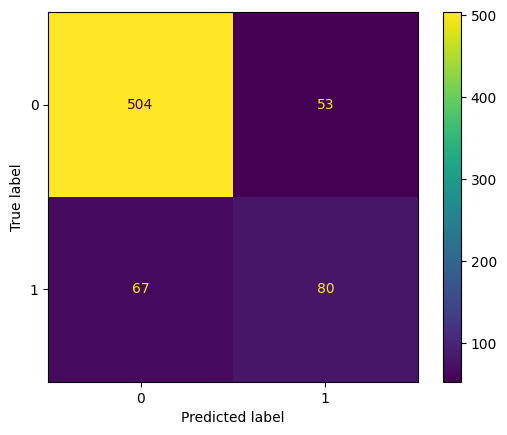

In [243]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();

The models performed about the same without gridsearching, however AdaBoostClassifier performed the best